# LIBRERIAS

In [1]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import statsmodels.graphics.api as smg

# IMPORTA LOS DATOS

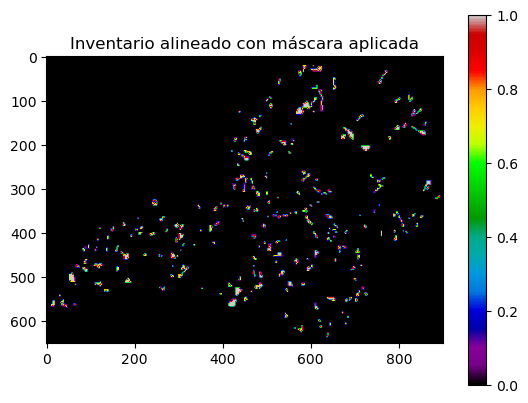

In [2]:
import numpy as np
import rasterio as rio
from rasterio.warp import reproject, Resampling
import matplotlib.pyplot as plt

# Abrir ráster de referencia (pendiente)
with rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\slope.tif") as src_ref:
    ref_shape = src_ref.read(1).shape
    ref_transform = src_ref.transform
    ref_crs = src_ref.crs
    msk = src_ref.read_masks(1)
    msk = np.where(msk == 0, np.nan, 1)

# Abrir ráster a alinear (inventario)
with rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\IMM.tif") as src_inv:
    inventario = src_inv.read(1)
    aligned_inv = np.empty(ref_shape, dtype=inventario.dtype)

    reproject(
        source=inventario,
        destination=aligned_inv,
        src_transform=src_inv.transform,
        src_crs=src_inv.crs,
        dst_transform=ref_transform,
        dst_crs=ref_crs,
        resampling=Resampling.nearest
    )

# Aplicar la máscara
inventario1 = aligned_inv * msk

# Visualizar
plt.imshow(inventario1, cmap='nipy_spectral')
plt.colorbar()
plt.title("Inventario alineado con máscara aplicada")
plt.show()

In [3]:
np.unique(inventario)

array([0, 1], dtype=uint8)

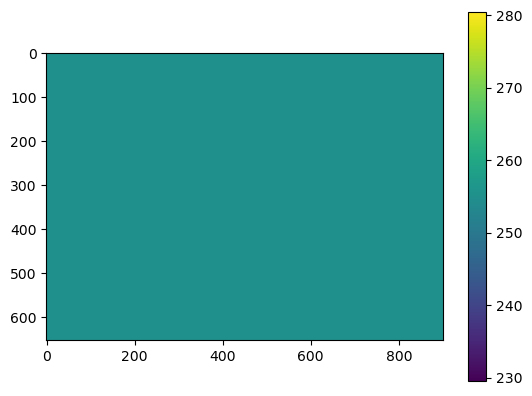

In [4]:
raster = rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\slope.tif")
msk=raster.read_masks(1)
msk=np.where(msk==0,np.nan,msk)
plt.imshow(msk)
plt.colorbar();

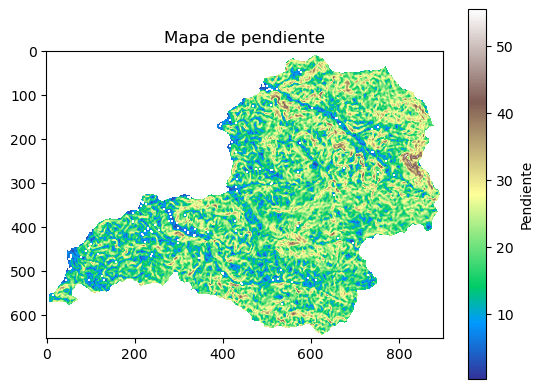

In [5]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

# Abrir el ráster
with rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\slope.tif") as raster:
    slope = raster.read(1).astype(float)  # Leer la banda 1 y convertir a float

# Reemplazar valores no deseados (como 0 o negativos) con NaN
slope = np.where(slope <= 0, np.nan, slope)

# Crear una máscara donde slope es NaN
masked_slope = np.ma.masked_where(np.isnan(slope), slope)

# Visualizar
plt.imshow(masked_slope, cmap='terrain')
plt.colorbar(label='Pendiente')
plt.title("Mapa de pendiente")
plt.show()

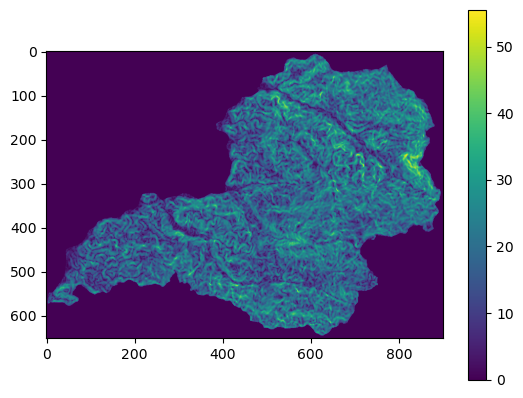

In [6]:
raster = rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\slope.tif")
pendiente=raster.read(1)
plt.imshow(pendiente)
plt.colorbar();

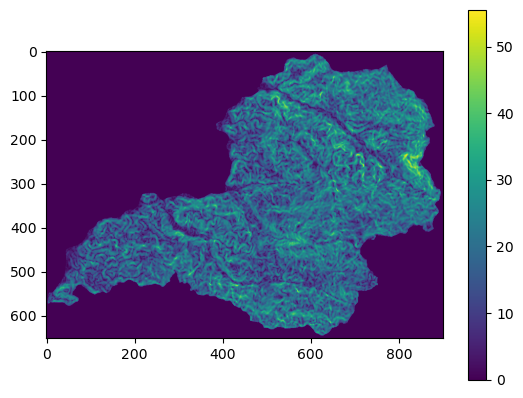

In [7]:
pendiente=np.where(pendiente<0,np.nan,pendiente)
plt.imshow(pendiente)
plt.colorbar();

In [8]:
type(pendiente)

numpy.ndarray

In [9]:
np.shape(pendiente)

(651, 901)

In [10]:
pendiente_vector=pendiente.ravel()  # para pasarlo a un vector
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos NaN
pendiente_vector_MenM.shape # otra forma de saber las dimensiones

(586551,)

(586551,)

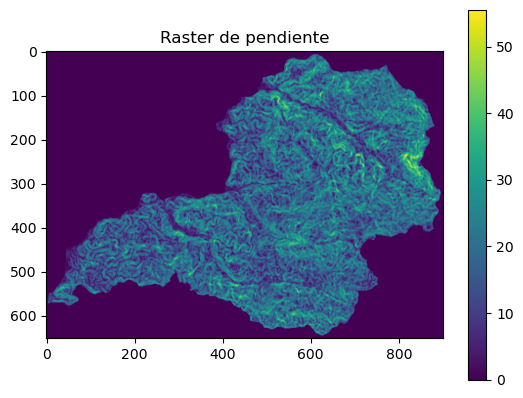

In [11]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

# Abrir el raster de pendiente
raster = rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\slope.tif")
pendiente = raster.read(1)

# Reemplazar valores menores a -100 por NaN
pendiente = np.where(pendiente < -100, np.nan, pendiente)

# Vectorizar
pendiente_vector = pendiente.ravel()
pendiente_vector_MenM = pendiente_vector[~np.isnan(pendiente_vector)]

# Visualización
plt.imshow(pendiente)
plt.colorbar()
plt.title("Raster de pendiente")

# Resultado
pendiente_vector_MenM.shape


(586551,)

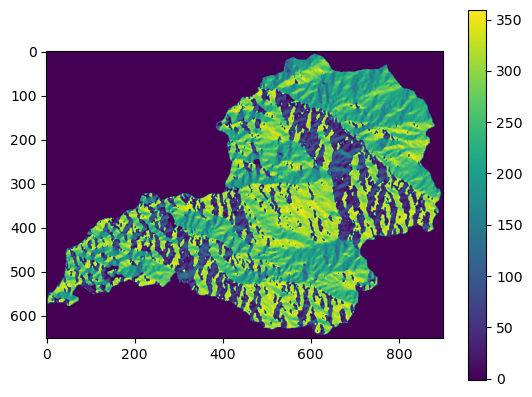

In [12]:
raster = rio.open(r'C:\Users\Santi-PC\Desktop\Con fe se puede\Carto_new\Aspect_Fill_1.tif')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape

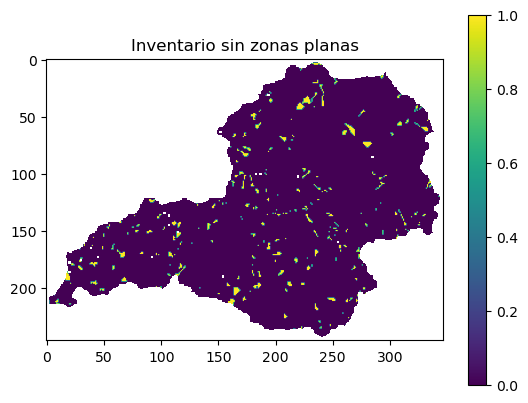

Shape del vector sin NaNs: (42946,)


In [13]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.enums import Resampling

# Abrir el raster principal (inventario)
raster = rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\IMM.tif")
inventario = raster.read(1)

# Abrir el raster de pendiente (slope)
slope_ds = rio.open(r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\slope.tif")

# Reproyectar slope al tamaño de IMM
slope_mask = slope_ds.read(
    1,
    out_shape=(raster.count, raster.height, raster.width),
    resampling=Resampling.nearest
)

# Crear máscara: excluir zonas planas (pendiente = 0)
msk = np.where(slope_mask > 0, 1, np.nan)

# Aplicar la máscara al raster inventario
inventario_masc = msk * inventario

# Visualización
plt.imshow(inventario_masc)
plt.colorbar()
plt.title("Inventario sin zonas planas")
plt.show()

# Vector sin NaNs
inventario_vector = inventario_masc.ravel()
inventario_vector_MenM = inventario_vector[~np.isnan(inventario_vector)]
print("Shape del vector sin NaNs:", inventario_vector_MenM.shape)


(298006,)

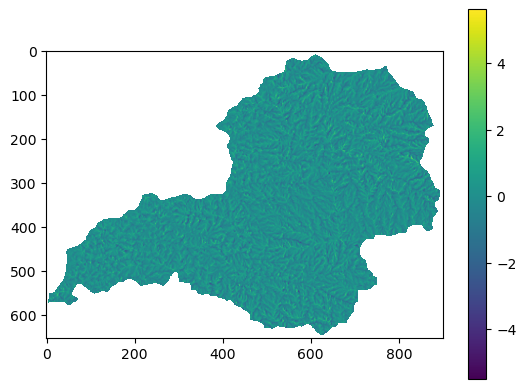

In [14]:
raster = rio.open(r'C:\Users\Santi-PC\Desktop\Con fe se puede\Carto_new\Curva_hor.tif')
curvatura=raster.read(1)
curvatura=np.where(curvatura<-16.64,np.nan,curvatura)
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
plt.imshow(curvatura)
plt.colorbar()
curvatura.shape
curvatura_vector_MenM.shape

(298006,)

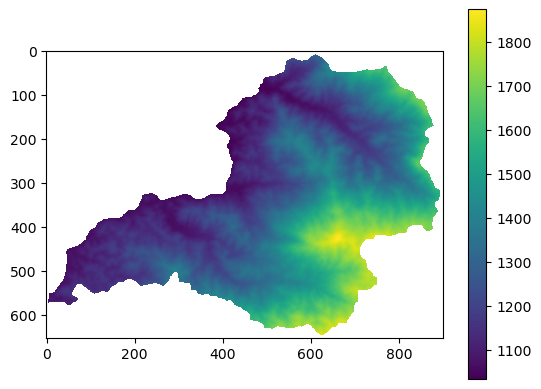

In [15]:
raster = rio.open(r'C:\Users\Santi-PC\Desktop\Con fe se puede\Carto_new\DEM.tif')
elevacion=raster.read(1)
elevacion=np.where(elevacion<154,np.nan,elevacion)
elevacion_vector=elevacion.ravel()
elevacion_vector_MenM=elevacion_vector[~np.isnan(elevacion_vector)]
plt.imshow(elevacion)
plt.colorbar()
elevacion_vector_MenM.shape

In [16]:
import rasterio as rio
import numpy as np
import pandas as pd
from rasterio.enums import Resampling

# --- Rutas individuales ---
ruta_inventario = r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\IMM.tif"
ruta_pendiente  = r"C:\Users\Santi-PC\Desktop\Con fe se puede\Variables\slope.tif"
ruta_aspecto    = r"C:\Users\Santi-PC\Desktop\Con fe se puede\Carto_new\Aspect_Fill_1.tif"
ruta_elevacion  = r'C:\Users\Santi-PC\Desktop\Con fe se puede\Carto_new\DEM.tif'
ruta_curvatura  = r'C:\Users\Santi-PC\Desktop\Con fe se puede\Carto_new\Curva_hor.tif'

# --- Raster base (inventario) ---
r_inventario = rio.open(ruta_inventario)
inventario = r_inventario.read(1)

height, width = r_inventario.height, r_inventario.width

def leer_y_resamplear(ruta, shape, ref):
    with rio.open(ruta) as src:
        return src.read(
            1,
            out_shape=(1, shape[0], shape[1]),
            resampling=Resampling.nearest
        )

# Resamplear al shape del inventario
pendiente  = leer_y_resamplear(ruta_pendiente, (height, width), r_inventario)
aspecto    = leer_y_resamplear(ruta_aspecto, (height, width), r_inventario)
elevacion  = leer_y_resamplear(ruta_elevacion, (height, width), r_inventario)
curvatura  = leer_y_resamplear(ruta_curvatura, (height, width), r_inventario)

# --- Reemplazar valores inválidos ---
pendiente  = np.where(pendiente < -100, np.nan, pendiente)
aspecto    = np.where(aspecto < -100, np.nan, aspecto)
elevacion  = np.where(elevacion < -100, np.nan, elevacion)
curvatura  = np.where(curvatura < -100, np.nan, curvatura)

# --- Crear máscara válida común ---
mascara_valida = (
    ~np.isnan(inventario) &
    ~np.isnan(pendiente) &
    ~np.isnan(aspecto) &
    ~np.isnan(elevacion) &
    ~np.isnan(curvatura)
)

# --- Aplicar máscara ---
inventario_vector = inventario[mascara_valida]
pendiente_vector  = pendiente[mascara_valida]
aspecto_vector    = aspecto[mascara_valida]
elevacion_vector  = elevacion[mascara_valida]
curvatura_vector  = curvatura[mascara_valida]

# --- Crear DataFrame ---
df = pd.DataFrame({
    'inventario': inventario_vector,
    'pendiente': pendiente_vector,
    'aspecto': aspecto_vector,
    'elevacion': elevacion_vector,
    'curvatura': curvatura_vector
})

# --- Resultado ---
print(df.shape)
print(list(df.columns))
print(df)  # 👈 Aquí se imprime el contenido completo del DataFrame



(43381, 5)
['inventario', 'pendiente', 'aspecto', 'elevacion', 'curvatura']
       inventario  pendiente     aspecto  elevacion     curvatura
0               0   0.000000    0.000000     1320.0 -0.000000e+00
1               0  12.360396  116.175293     1319.0  6.841379e-01
2               0   0.000000    0.000000     1289.0  3.840000e-01
3               0  23.396502  236.309937     1300.0  9.846154e-01
4               0  20.674463  212.005386     1312.0  4.602247e-01
...           ...        ...         ...        ...           ...
43376           0   0.000000    0.000000     1821.0  4.800000e-01
43377           0   0.000000    0.000000     1844.0 -1.058791e-16
43378           0  18.883389   37.874985     1840.0  1.859459e-01
43379           0  22.406872   22.833654     1831.0 -1.324138e+00
43380           0  22.130608   22.150238     1828.0 -3.200000e-02

[43381 rows x 5 columns]


# DATA FRAME

In [21]:
# --- Crear diccionario con los vectores ---
d = {
    'inventario': inventario_vector,
    'pendiente': pendiente_vector,
    'aspecto': aspecto_vector,
    'elevacion': elevacion_vector,
    'curvatura': curvatura_vector
}

# --- Crear DataFrame e imprimir columnas ---
df = pd.DataFrame(d)
print(list(df.columns))
print(df)


['inventario', 'pendiente', 'aspecto', 'elevacion', 'curvatura']
       inventario  pendiente     aspecto  elevacion     curvatura
0               0   0.000000    0.000000     1320.0 -0.000000e+00
1               0  12.360396  116.175293     1319.0  6.841379e-01
2               0   0.000000    0.000000     1289.0  3.840000e-01
3               0  23.396502  236.309937     1300.0  9.846154e-01
4               0  20.674463  212.005386     1312.0  4.602247e-01
...           ...        ...         ...        ...           ...
43376           0   0.000000    0.000000     1821.0  4.800000e-01
43377           0   0.000000    0.000000     1844.0 -1.058791e-16
43378           0  18.883389   37.874985     1840.0  1.859459e-01
43379           0  22.406872   22.833654     1831.0 -1.324138e+00
43380           0  22.130608   22.150238     1828.0 -3.200000e-02

[43381 rows x 5 columns]


In [22]:
df.head()

inventario  pendiente     aspecto  elevacion  curvatura
0           0   0.000000    0.000000     1320.0  -0.000000
1           0  12.360396  116.175293     1319.0   0.684138
2           0   0.000000    0.000000     1289.0   0.384000
3           0  23.396502  236.309937     1300.0   0.984615
4           0  20.674463  212.005386     1312.0   0.460225

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43381 entries, 0 to 43380
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   inventario  43381 non-null  uint8  
 1   pendiente   43381 non-null  float32
 2   aspecto     43381 non-null  float32
 3   elevacion   43381 non-null  float64
 4   curvatura   43381 non-null  float32
dtypes: float32(3), float64(1), uint8(1)
memory usage: 889.8 KB


# MÉTODOS ESTÁDISTICOS MULTIVARIADOS

## Análisis discriminante lineal

In [24]:
d1={'inventario':inventario_vector,'pendiente':pendiente_vector,'aspecto':aspecto_vector, 'curvatura':curvatura_vector, 'elevacion': elevacion_vector}
df0 = pd.DataFrame(d1)
print(list(df0.columns))

['inventario', 'pendiente', 'aspecto', 'curvatura', 'elevacion']


In [25]:
#Normalizamos las varibles de la data frame
var_names2=['aspecto','pendiente', 'curvatura','elevacion']
for var in var_names2:
    df0[var]=(df0[var]-df0[var].mean())/df0[var].std()
df0.head()

inventario  pendiente   aspecto  curvatura  elevacion
0           0  -2.398226 -1.770344  -0.019792  -0.106341
1           0  -0.815672 -0.762481   0.862172  -0.111192
2           0  -2.398226 -1.770344   0.475246  -0.256717
3           0   0.597327  0.279731   1.249536  -0.203358
4           0   0.248813  0.068880   0.573511  -0.145148

In [26]:
print(df0.columns)

Index(['inventario', 'pendiente', 'aspecto', 'curvatura', 'elevacion'], dtype='object')


In [27]:
import statsmodels.formula.api as sfm
lr   = sfm.logit(formula = "inventario ~ pendiente + elevacion+ aspecto + curvatura", data = df0).fit()
print(lr.summary())

Optimization terminated successfully.
         Current function value: 0.145436
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             inventario   No. Observations:                43381
Model:                          Logit   Df Residuals:                    43376
Method:                           MLE   Df Model:                            4
Date:                Tue, 10 Jun 2025   Pseudo R-squ.:                0.002184
Time:                        07:35:56   Log-Likelihood:                -6309.1
converged:                       True   LL-Null:                       -6322.9
Covariance Type:            nonrobust   LLR p-value:                 1.490e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3804      0.027   -125.002      0.000      -3.433      -3.327
pendiente      0.0337      0.

In [28]:
X=df0.drop("inventario", axis=1)
y=df0['inventario']
X.head()

pendiente   aspecto  curvatura  elevacion
0  -2.398226 -1.770344  -0.019792  -0.106341
1  -0.815672 -0.762481   0.862172  -0.111192
2  -2.398226 -1.770344   0.475246  -0.256717
3   0.597327  0.279731   1.249536  -0.203358
4   0.248813  0.068880   0.573511  -0.145148

In [29]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced', solver='newton-cg')
model

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [30]:
result=model.fit(X,y)
print(result.coef_)

[[ 0.03672499 -0.05547458  0.00516774 -0.12484742]]


In [31]:
y_pred=result.predict(X)
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [32]:
y_prob=result.predict_proba(X)
y_prob

array([[0.49643599, 0.50356401],
       [0.49459317, 0.50540683],
       [0.49110379, 0.50889621],
       ...,
       [0.55696712, 0.44303288],
       [0.5522252 , 0.4477748 ],
       [0.54988609, 0.45011391]])

In [33]:
y_probs=result.predict_proba(X)[:,1]
y_probs

array([0.50356401, 0.50540683, 0.50889621, ..., 0.44303288, 0.4477748 ,
       0.45011391])

In [34]:
pendiente_vector2=np.nan_to_num(pendiente_vector)
curvatura_vector2=np.nan_to_num(curvatura_vector)
aspecto_vector2=np.nan_to_num(aspecto_vector)
elevacion_vector2=np.nan_to_num(elevacion_vector)

##Discriminante lineal

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=1)
LDA

LinearDiscriminantAnalysis(n_components=1)

In [36]:
model = LDA.fit(X,y)

In [37]:
f={'pendiente':pendiente_vector2,'aspecto':aspecto_vector2,'curvatura':curvatura_vector2, 'elevacion':elevacion_vector2}
x_map=pd.DataFrame(f)
x_map

pendiente     aspecto     curvatura  elevacion
0       0.000000    0.000000 -0.000000e+00     1320.0
1      12.360396  116.175293  6.841379e-01     1319.0
2       0.000000    0.000000  3.840000e-01     1289.0
3      23.396502  236.309937  9.846154e-01     1300.0
4      20.674463  212.005386  4.602247e-01     1312.0
...          ...         ...           ...        ...
43376   0.000000    0.000000  4.800000e-01     1821.0
43377   0.000000    0.000000 -1.058791e-16     1844.0
43378  18.883389   37.874985  1.859459e-01     1840.0
43379  22.406872   22.833654 -1.324138e+00     1831.0
43380  22.130608   22.150238 -3.200000e-02     1828.0

[43381 rows x 4 columns]

In [38]:
# Imprimir columnas usadas en el entrenamiento
print("Columnas usadas en el entrenamiento del modelo:")
print(list(model.feature_names_in_))

# Imprimir columnas de x_map
print("\nColumnas actuales en x_map:")
print(list(x_map.columns))

Columnas usadas en el entrenamiento del modelo:
['pendiente', 'aspecto', 'curvatura', 'elevacion']

Columnas actuales en x_map:
['pendiente', 'aspecto', 'curvatura', 'elevacion']


In [39]:
IS=model.predict(x_map)

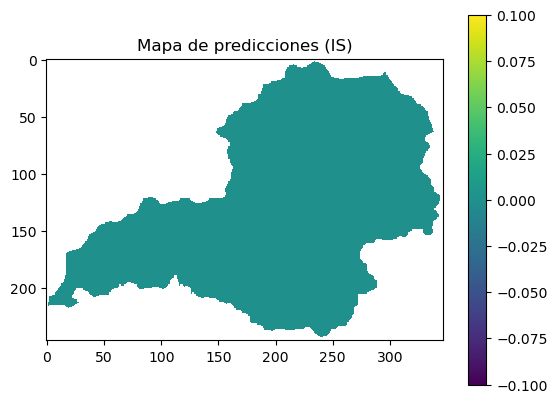

In [40]:
# Crear un raster vacío lleno de np.nan del mismo tamaño que 'pendiente'
IS_raster = np.full(pendiente.shape, np.nan)

# Rellenar con los valores de IS donde la máscara es válida
IS_raster[mascara_valida] = IS

# Visualizar
plt.imshow(IS_raster)
plt.colorbar()
plt.title("Mapa de predicciones (IS)")
plt.show()


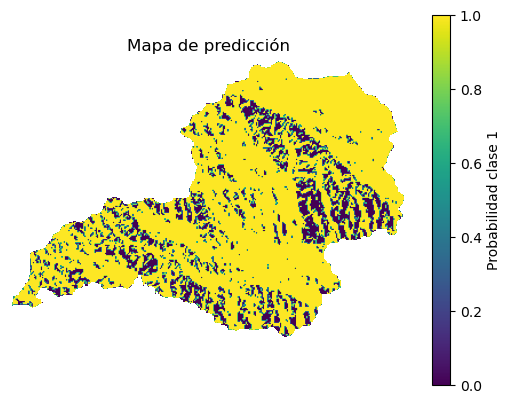

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# --- Crear raster vacío del tamaño original ---
IS_raster = np.full(pendiente.shape, np.nan, dtype=np.float32)

# --- Índices planos de píxeles válidos ---
indices_validos = np.where(mascara_valida.ravel())[0]

# --- Verificar coincidencia de tamaños ---
if IS.shape[0] != indices_validos.shape[0]:
    raise ValueError("¡El tamaño de IS no coincide con los píxeles válidos!")

# --- Insertar predicciones en el raster ---
IS_raster.ravel()[indices_validos] = IS

# --- Visualizar (opcionalmente aplicar máscara por pendiente) ---
IS_raster = np.where(pendiente < 0, np.nan, IS_raster)

plt.imshow(IS_raster, cmap='viridis', vmin=0, vmax=1)
plt.colorbar(label='Probabilidad clase 1')
plt.title("Mapa de predicción")
plt.axis('off')
plt.show()


In [ ]:
##Support vector machine

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=1)
LDA

LinearDiscriminantAnalysis(n_components=1)

In [42]:
model = LDA.fit(X,y)

In [43]:
f={'pendiente':pendiente_vector2,'aspecto':aspecto_vector2, 'curvatura':curvatura_vector2, 'elevacion':elevacion_vector2}
x_map=pd.DataFrame(f)
x_map

pendiente     aspecto     curvatura  elevacion
0       0.000000    0.000000 -0.000000e+00     1320.0
1      12.360396  116.175293  6.841379e-01     1319.0
2       0.000000    0.000000  3.840000e-01     1289.0
3      23.396502  236.309937  9.846154e-01     1300.0
4      20.674463  212.005386  4.602247e-01     1312.0
...          ...         ...           ...        ...
43376   0.000000    0.000000  4.800000e-01     1821.0
43377   0.000000    0.000000 -1.058791e-16     1844.0
43378  18.883389   37.874985  1.859459e-01     1840.0
43379  22.406872   22.833654 -1.324138e+00     1831.0
43380  22.130608   22.150238 -3.200000e-02     1828.0

[43381 rows x 4 columns]

In [44]:
IS=model.predict(x_map)

In [45]:
print(np.unique(IS))  # Ver si hay solo 1 o 2 valores

[0]


In [46]:
IS = model.predict_proba(x_map)[:, 1]  # Probabilidad clase positiva

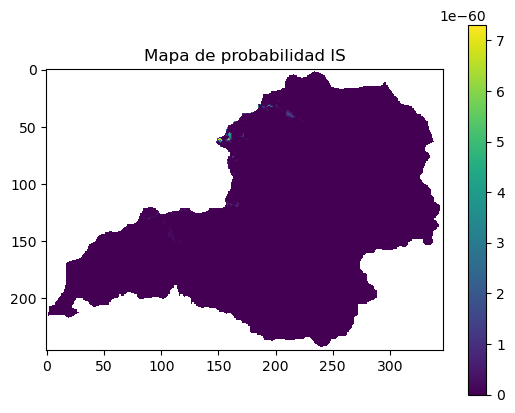

In [47]:
IS = model.predict_proba(x_map)[:, 1]

# Reconstruir el raster
IS_raster = np.full(pendiente.shape, np.nan)
IS_raster[mascara_valida] = IS

# Visualizar
plt.imshow(IS_raster, cmap='viridis')
plt.colorbar()
plt.title("Mapa de probabilidad IS")
plt.show()


## Support vector machine

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)

In [50]:
df1=df0[(df0["inventario"]==1) | (df0["inventario"]==0).sample(frac=0.01)]
X_01=df1.drop("inventario", axis=1)
y_01=df1['inventario']
df1['inventario'].value_counts()

inventario
1    1441
0     419
Name: count, dtype: int64

In [ ]:
model.fit(X_01,y_01)

In [ ]:
IS_01 = model.predict(x_map)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Predicción del modelo ---
IS = model.predict_proba(x_map)[:, 1]  # Probabilidad clase positiva

# --- Crear raster vacío con la forma original del raster base (pendiente) ---
IS_raster = np.full(pendiente.shape, np.nan, dtype=np.float32)

# --- Obtener los índices planos donde la máscara es válida ---
indices_validos = np.where(mascara_valida.ravel())[0]

# Verificar coincidencia de tamaños
if IS.shape[0] != indices_validos.shape[0]:
    raise ValueError("¡Error! IS y la máscara válida no coinciden en longitud.")

# --- Asignar las predicciones al raster ---
IS_raster.ravel()[indices_validos] = IS

# --- Visualizar ---
plt.figure(figsize=(12, 10))
plt.imshow(IS_raster, cmap='viridis', origin='upper')
plt.colorbar(label='Probabilidad predicha (IS)')
plt.title('Mapa de Predicción - Modelo Paramétrico')
plt.axis('off')
plt.tight_layout()
plt.show()

## Random forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 1000)

In [51]:
rf.fit(X_01, y_01);

In [52]:
IS_01=rf.predict(x_map)

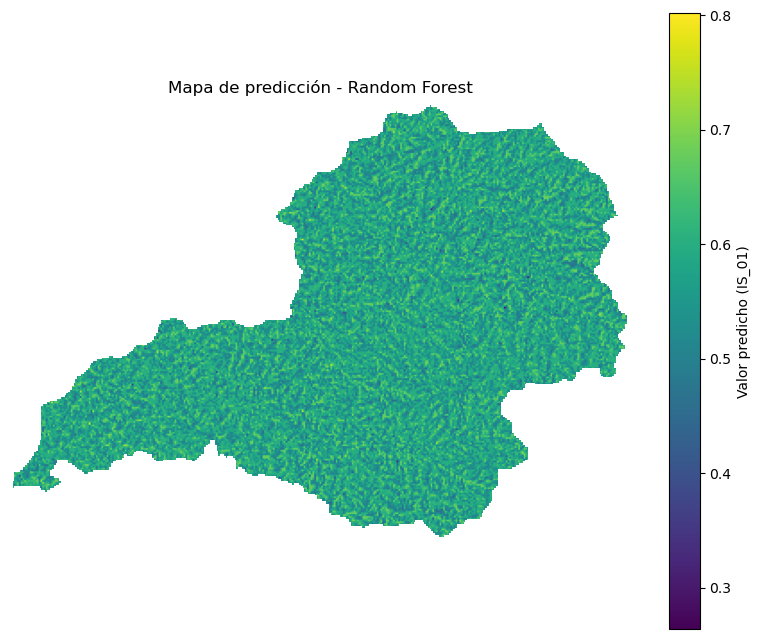

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# --- Predicción con Random Forest (Regresión o Clasificación) ---
IS_01 = rf.predict(x_map)  # Puede ser de tipo float si es regresión

# --- Crear raster vacío con el shape original (mismo que 'pendiente') ---
IS_raster = np.full(pendiente.shape, np.nan, dtype=np.float32)

# --- Obtener índices planos donde la máscara válida aplica ---
indices_validos = np.where(mascara_valida.ravel())[0]

# --- Verificación de tamaño ---
if IS_01.shape[0] != indices_validos.shape[0]:
    raise ValueError("¡Error! Las predicciones no coinciden con los píxeles válidos.")

# --- Rellenar el raster en las posiciones válidas ---
IS_raster.ravel()[indices_validos] = IS_01

# --- Visualizar resultado ---
plt.figure(figsize=(10, 8))
plt.imshow(IS_raster, cmap='viridis')
plt.colorbar(label='Valor predicho (IS_01)')
plt.title("Mapa de predicción - Random Forest")
plt.axis('off')
plt.show()


In [56]:
print(list(rf.feature_importances_))

[0.24656300239686774, 0.26418192314831695, 0.21455789252815916, 0.2746971819266562]


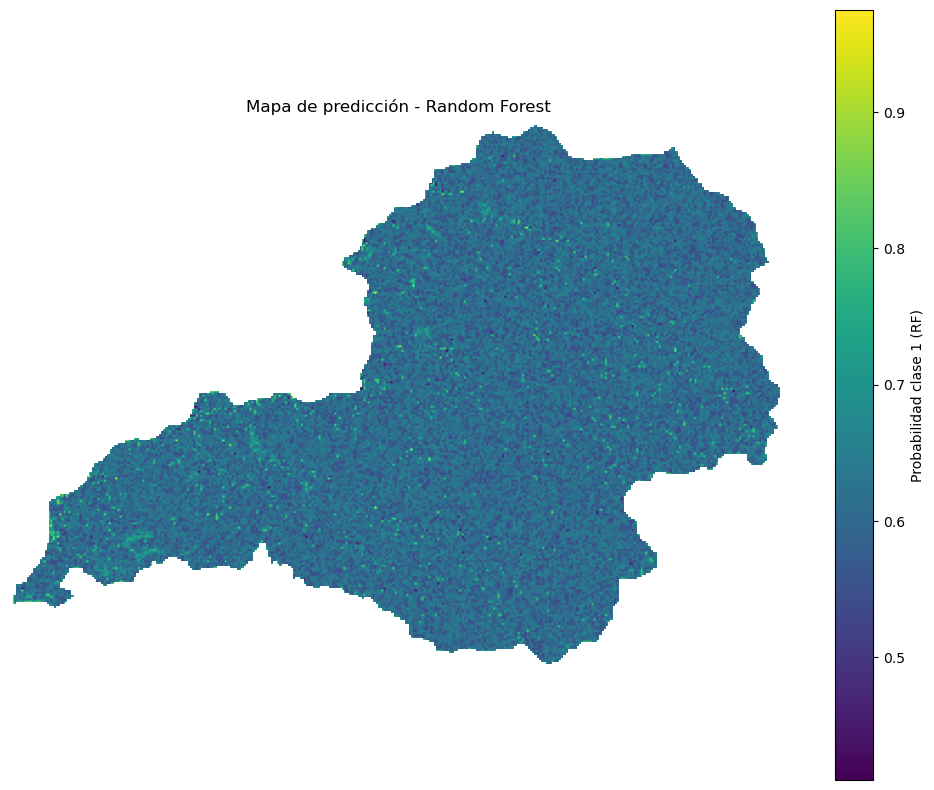

Rango de probabilidades: [0.410, 0.975]


In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Paso 1: Combinar X_01 y y_01
df = pd.DataFrame(X_01)
df['target'] = y_01

# Separar clases
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

# Balancear: sobremuestreo de clase 0 para igualar a clase 1
df_0_over = resample(df_0, replace=True, n_samples=len(df_1), random_state=42)
df_bal = pd.concat([df_1, df_0_over]).sample(frac=1, random_state=42)

X_bal = df_bal.drop('target', axis=1)
y_bal = df_bal['target']

# Paso 2: Escalar (opcional para RandomForest, pero ayuda si hay muchas variables)
scaler = StandardScaler()
X_bal_scaled = scaler.fit_transform(X_bal)
x_map_scaled = scaler.transform(x_map)

# Paso 3: Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_bal_scaled, y_bal)

# Paso 4: Predecir probabilidades de clase 1
IS = rf.predict_proba(x_map_scaled)[:, 1]  # ← Mapa continuo de probabilidades

# Paso 5: Reconstruir raster
IS_raster = np.full(pendiente.shape, np.nan, dtype=np.float32)
indices_validos = np.where(mascara_valida.ravel())[0]

if IS.shape[0] != indices_validos.shape[0]:
    raise ValueError("Las dimensiones de IS y la máscara no coinciden.")

IS_raster.ravel()[indices_validos] = IS

# Paso 6: Visualizar
plt.figure(figsize=(10, 8))
plt.imshow(IS_raster, cmap='viridis')
plt.colorbar(label='Probabilidad clase 1 (RF)')
plt.title("Mapa de predicción - Random Forest")
plt.axis('off')
plt.tight_layout()
plt.show()

# Rango real de predicciones
print(f"Rango de probabilidades: [{np.nanmin(IS_raster):.3f}, {np.nanmax(IS_raster):.3f}]")


C:\Users\Santi-PC\AppData\Local\Temp\ipykernel_10500\339748542.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


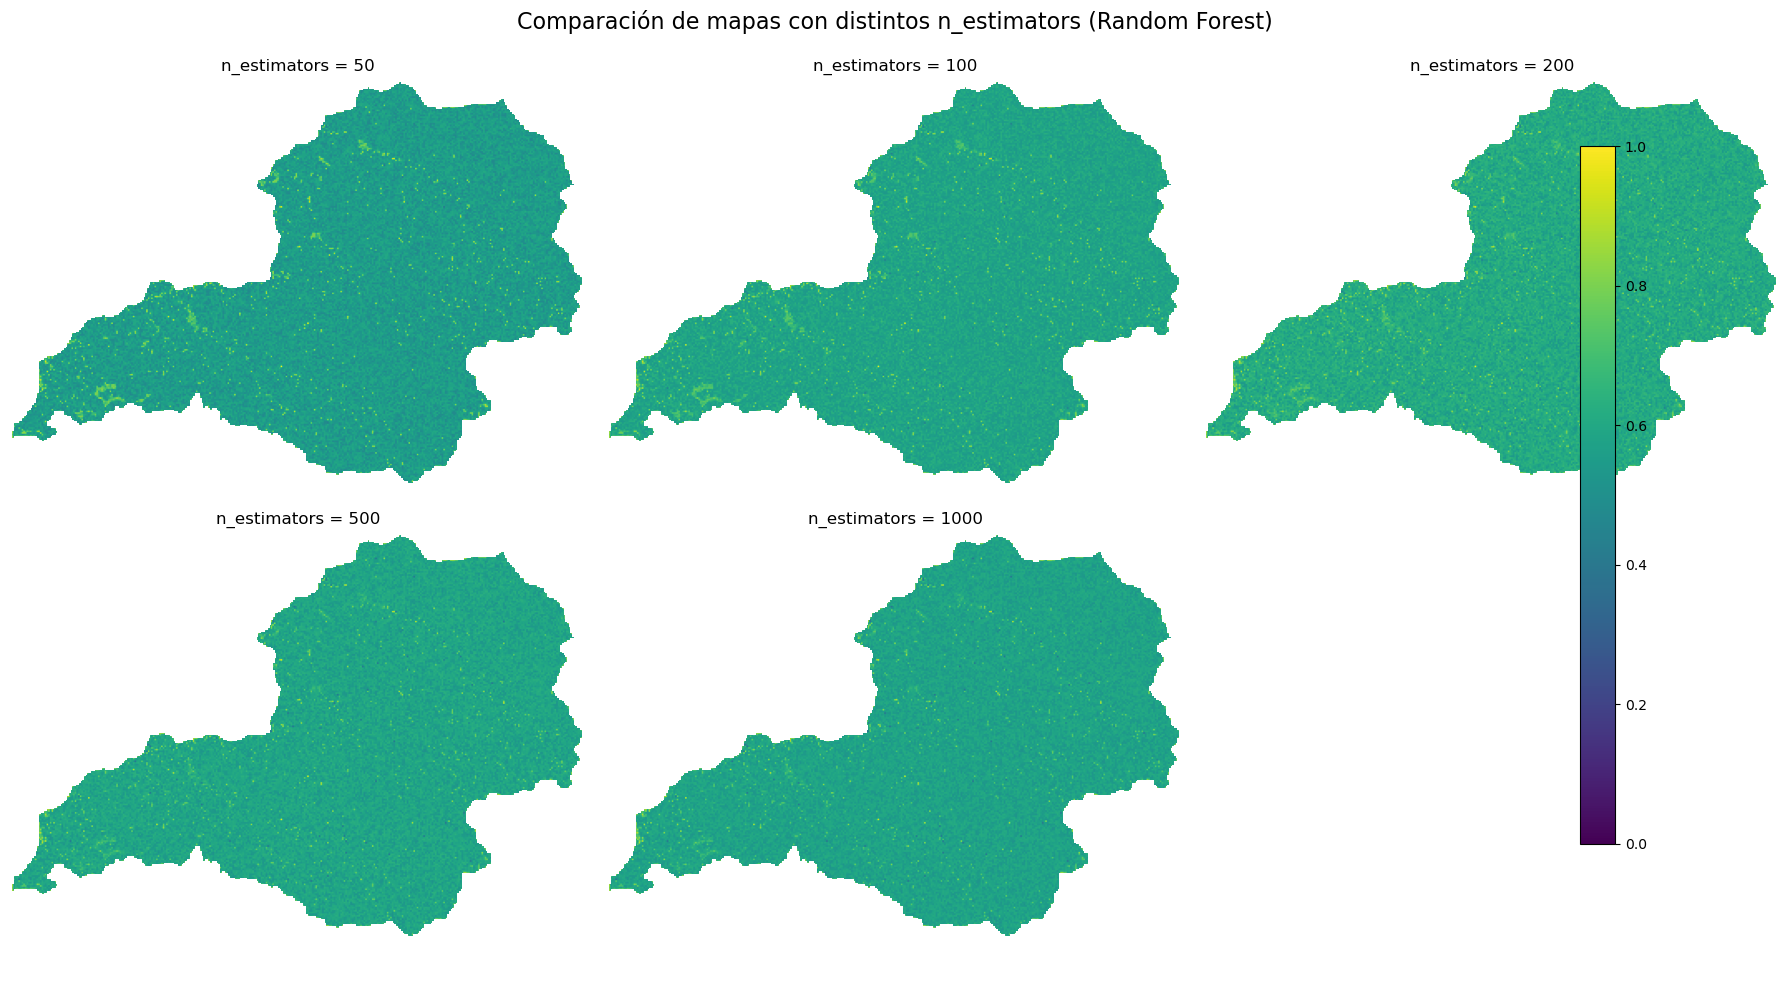

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
import pandas as pd

# --- Preparación: balancear datos ---
df = pd.DataFrame(X_01)
df['target'] = y_01

df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]
df_0_over = resample(df_0, replace=True, n_samples=len(df_1), random_state=42)
df_bal = pd.concat([df_1, df_0_over]).sample(frac=1, random_state=42)

X_bal = df_bal.drop('target', axis=1)
y_bal = df_bal['target']

# --- Escalamiento ---
scaler = StandardScaler()
X_bal_scaled = scaler.fit_transform(X_bal)
x_map_scaled = scaler.transform(x_map)

# --- Configuración de modelos a comparar ---
estimadores = [50, 100, 200, 500, 1000]
mapas = []

# --- Entrenar, predecir, reconstruir ---
for n in estimadores:
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf.fit(X_bal_scaled, y_bal)
    
    IS = rf.predict_proba(x_map_scaled)[:, 1]
    
    IS_raster = np.full(pendiente.shape, np.nan, dtype=np.float32)
    indices_validos = np.where(mascara_valida.ravel())[0]
    
    if IS.shape[0] != indices_validos.shape[0]:
        raise ValueError(f"¡Error de tamaño con n_estimators={n}!")
    
    IS_raster.ravel()[indices_validos] = IS
    mapas.append((n, IS_raster))

# --- Visualización múltiple ---
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

for i, (n, raster) in enumerate(mapas):
    ax = axs[i]
    im = ax.imshow(raster, cmap='viridis', vmin=0, vmax=1)
    ax.set_title(f'n_estimators = {n}')
    ax.axis('off')

# Ocultar subplot vacío si estimadores < 6
for j in range(len(mapas), len(axs)):
    axs[j].axis('off')

fig.suptitle("Comparación de mapas con distintos n_estimators (Random Forest)", fontsize=16)
fig.colorbar(im, ax=axs, fraction=0.025)
plt.tight_layout()
plt.show()


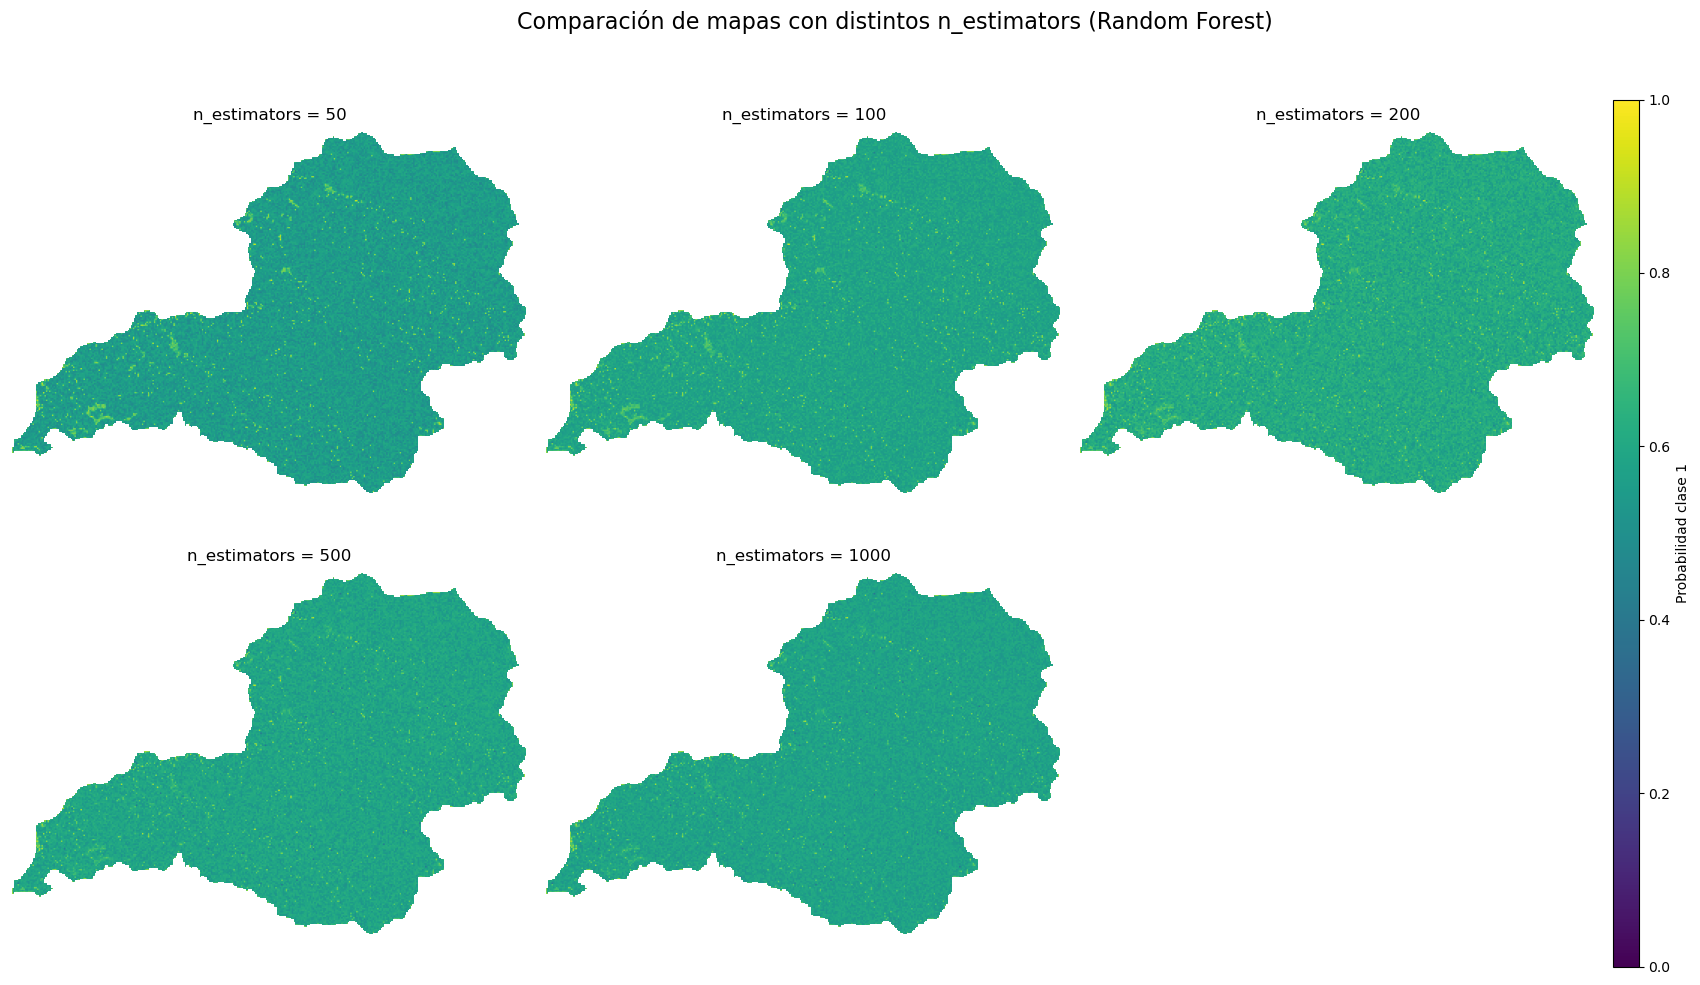

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
import pandas as pd

# --- Preparación: balancear datos ---
df = pd.DataFrame(X_01)
df['target'] = y_01

df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]
df_0_over = resample(df_0, replace=True, n_samples=len(df_1), random_state=42)
df_bal = pd.concat([df_1, df_0_over]).sample(frac=1, random_state=42)

X_bal = df_bal.drop('target', axis=1)
y_bal = df_bal['target']

# --- Escalamiento ---
scaler = StandardScaler()
X_bal_scaled = scaler.fit_transform(X_bal)
x_map_scaled = scaler.transform(x_map)

# --- Configuración de modelos a comparar ---
estimadores = [50, 100, 200, 500, 1000]
mapas = []

# --- Entrenar, predecir, reconstruir ---
for n in estimadores:
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf.fit(X_bal_scaled, y_bal)
    
    IS = rf.predict_proba(x_map_scaled)[:, 1]
    
    IS_raster = np.full(pendiente.shape, np.nan, dtype=np.float32)
    indices_validos = np.where(mascara_valida.ravel())[0]
    
    if IS.shape[0] != indices_validos.shape[0]:
        raise ValueError(f"¡Error de tamaño con n_estimators={n}!")
    
    IS_raster.ravel()[indices_validos] = IS
    mapas.append((n, IS_raster))

# --- Visualización múltiple con espacio para la colorbar ---
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 0.05])  # Última columna = colorbar

axs = [plt.subplot(gs[i // 3, i % 3]) for i in range(len(mapas))]

for i, (n, raster) in enumerate(mapas):
    ax = axs[i]
    im = ax.imshow(raster, cmap='viridis', vmin=0, vmax=1)
    ax.set_title(f'n_estimators = {n}')
    ax.axis('off')

# Añadir colorbar en la última celda del gridspec
cax = plt.subplot(gs[:, 3])
fig.colorbar(im, cax=cax, label='Probabilidad clase 1')

fig.suptitle("Comparación de mapas con distintos n_estimators (Random Forest)", fontsize=16)
plt.tight_layout(rect=[0, 0, 0.95, 0.95])  # deja espacio para el título
plt.show()


In [74]:
for n in [50, 100, 200, 500, 1000]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf.fit(X_bal_scaled, y_bal)
    IS = rf.predict_proba(x_map_scaled)[:, 1]
    # (reconstrucción y visualización)

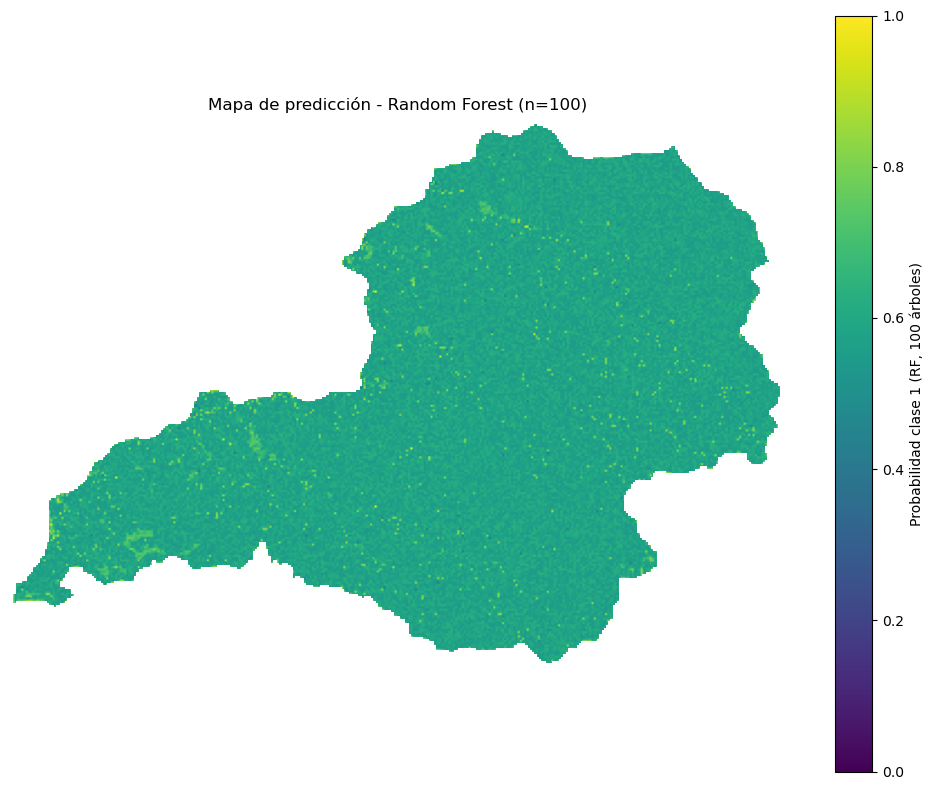

Rango de probabilidades: [0.410, 0.980]


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# --- Paso 1: Balanceo de clases ---
df = pd.DataFrame(X_01)
df['target'] = y_01

df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

# Sobremuestrear clase 0
df_0_over = resample(df_0, replace=True, n_samples=len(df_1), random_state=42)
df_bal = pd.concat([df_1, df_0_over]).sample(frac=1, random_state=42)

X_bal = df_bal.drop('target', axis=1)
y_bal = df_bal['target']

# --- Paso 2: Escalamiento ---
scaler = StandardScaler()
X_bal_scaled = scaler.fit_transform(X_bal)
x_map_scaled = scaler.transform(x_map)

# --- Paso 3: Entrenamiento Random Forest (100 árboles) ---
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_bal_scaled, y_bal)

# --- Paso 4: Predicción sobre el mapa ---
IS = rf.predict_proba(x_map_scaled)[:, 1]

# --- Paso 5: Reconstrucción del raster ---
IS_raster = np.full(pendiente.shape, np.nan, dtype=np.float32)
indices_validos = np.where(mascara_valida.ravel())[0]

if IS.shape[0] != indices_validos.shape[0]:
    raise ValueError("¡Tamaño incompatible entre IS y máscara!")

IS_raster.ravel()[indices_validos] = IS

# --- Paso 6: Visualización ---
plt.figure(figsize=(10, 8))
plt.imshow(IS_raster, cmap='viridis', vmin=0, vmax=1)
plt.colorbar(label='Probabilidad clase 1 (RF, 100 árboles)')
plt.title("Mapa de predicción - Random Forest (n=100)")
plt.axis('off')
plt.tight_layout()
plt.show()

# --- Rango de valores ---
print(f"Rango de probabilidades: [{np.nanmin(IS_raster):.3f}, {np.nanmax(IS_raster):.3f}]")


C:\Users\Santi-PC\AppData\Local\Temp\ipykernel_10500\924813547.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


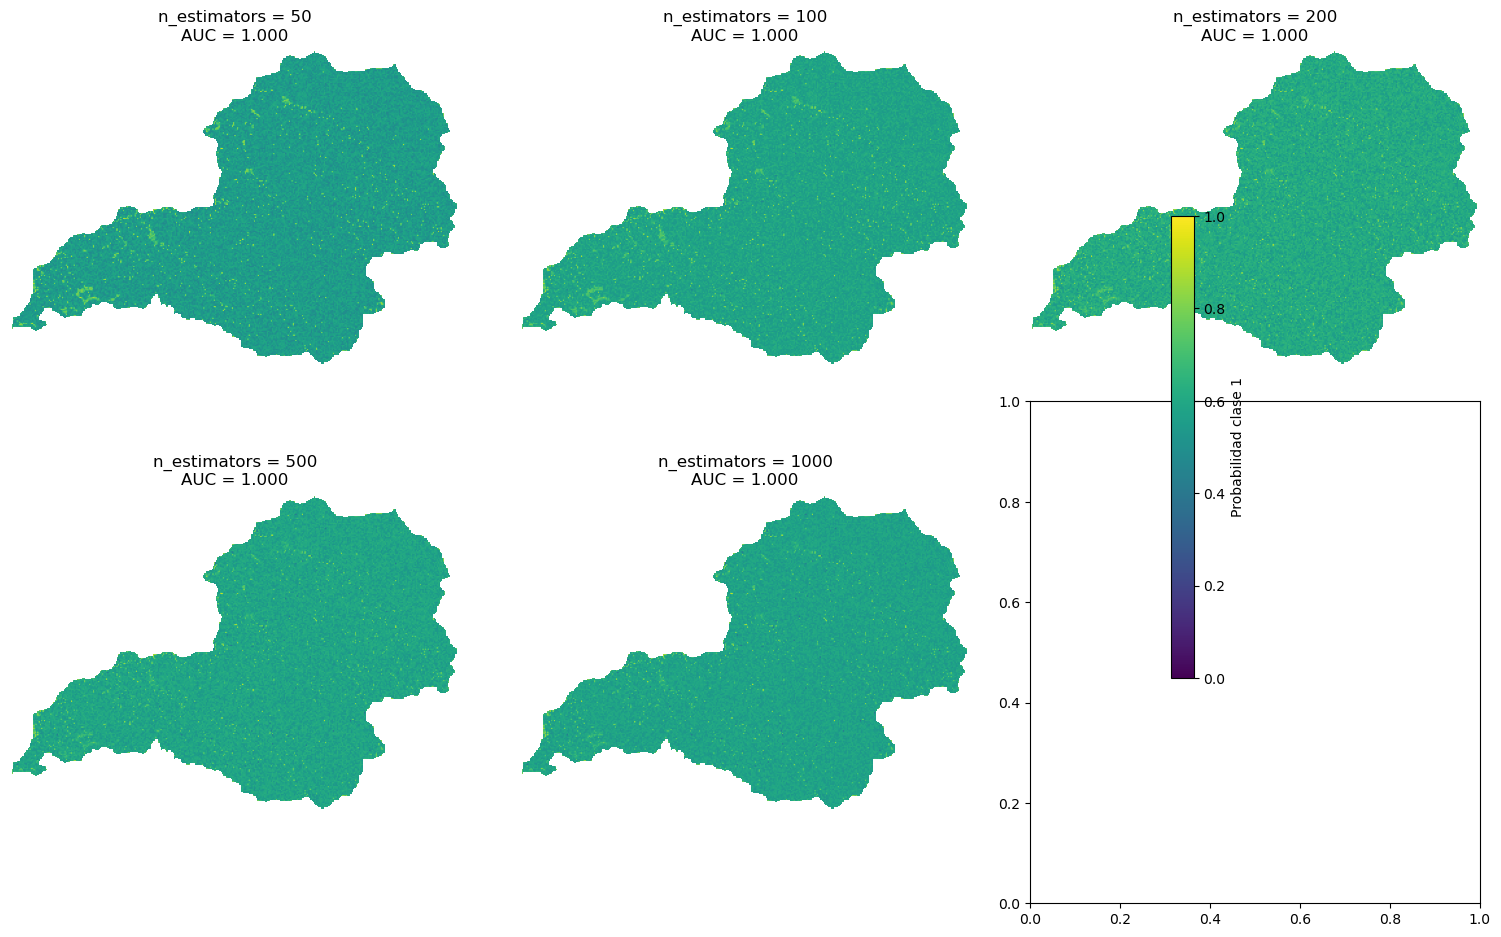

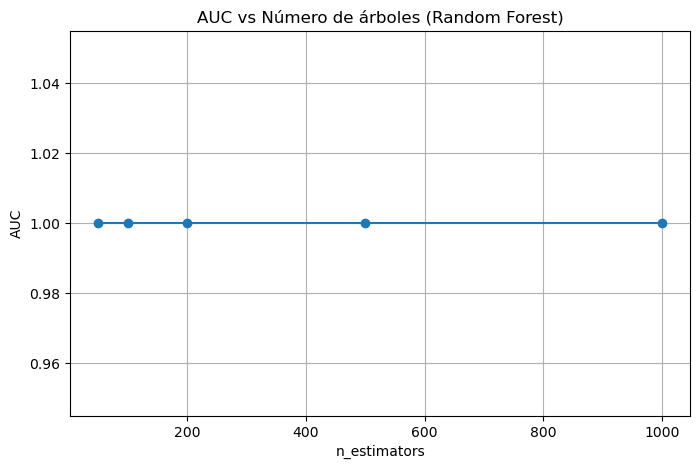

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score

# --- Paso 1: Balanceo de clases ---
df = pd.DataFrame(X_01)
df['target'] = y_01

df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

# Sobremuestreo de la clase minoritaria
df_0_over = resample(df_0, replace=True, n_samples=len(df_1), random_state=42)
df_bal = pd.concat([df_1, df_0_over]).sample(frac=1, random_state=42)

X_bal = df_bal.drop('target', axis=1)
y_bal = df_bal['target']

# --- Paso 2: Escalamiento ---
scaler = StandardScaler()
X_bal_scaled = scaler.fit_transform(X_bal)
x_map_scaled = scaler.transform(x_map)

# --- Paso 3: Entrenamiento, predicción y visualización por número de árboles ---
n_estimators_list = [50, 100, 200, 500, 1000]
auc_scores = []

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

for i, n in enumerate(n_estimators_list):
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf.fit(X_bal_scaled, y_bal)
    
    # Predicción sobre el mapa
    IS = rf.predict_proba(x_map_scaled)[:, 1]
    
    # Reconstrucción del raster
    IS_raster = np.full(pendiente.shape, np.nan, dtype=np.float32)
    indices_validos = np.where(mascara_valida.ravel())[0]

    if IS.shape[0] != indices_validos.shape[0]:
        raise ValueError(f"Incompatibilidad entre IS y máscara para n_estimators={n}")
        
    IS_raster.ravel()[indices_validos] = IS
    
    # AUC (opcional, si tienes datos de test o crossval)
    y_pred_prob = rf.predict_proba(X_bal_scaled)[:, 1]
    auc = roc_auc_score(y_bal, y_pred_prob)
    auc_scores.append(auc)
    
    # Mapa
    ax = axs[i]
    im = ax.imshow(IS_raster, cmap='viridis', vmin=0, vmax=1)
    ax.set_title(f'n_estimators = {n}\nAUC = {auc:.3f}')
    ax.axis('off')

# Colorbar global
fig.colorbar(im, ax=axs.tolist(), shrink=0.6, label='Probabilidad clase 1')
plt.tight_layout()
plt.show()

# --- Paso 4: Comparación de rendimiento (gráfica AUC) ---
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, auc_scores, marker='o')
plt.title('AUC vs Número de árboles (Random Forest)')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.grid(True)
plt.show()


## Redes neuronales

In [57]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(5,2),max_iter=500)  # dos capas escondidas, la primera con 5 neuronas y la segunda con dos neuronas
mlp

MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=500)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_01)
X_trans = scaler.transform(X_01)

In [59]:
mlp.fit(X_01,y_01)

MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=500)

In [60]:
IS=mlp.predict(x_map)

In [66]:
print("Min:", np.nanmin(IS))
print("Max:", np.nanmax(IS))
print("Valores únicos (si pocos):", np.unique(np.round(IS, 3)))

Min: 1.0
Max: 1.0
Valores únicos (si pocos): [1.]


In [67]:
classes, counts = np.unique(y_01, return_counts=True)
for c, n in zip(classes, counts):
    print(f"Clase {c}: {n} muestras")

Clase 0: 419 muestras
Clase 1: 1441 muestras


In [71]:
mlp = MLPClassifier(
    hidden_layer_sizes=(20, 10),
    max_iter=1000,
    random_state=42,
    class_weight='balanced')  # ← esto es clave


TypeError: MLPClassifier.__init__() got an unexpected keyword argument 'class_weight'

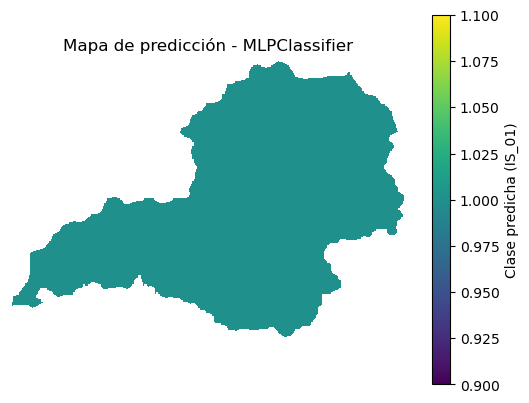

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Predicción de clase
IS_01 = mlp.predict(x_map)

# Crear raster vacío
IS_raster = np.full(pendiente.shape, np.nan, dtype=np.float32)

# Índices válidos según la máscara original
indices_validos = np.where(mascara_valida.ravel())[0]

# Verificar que las dimensiones coinciden
if IS_01.shape[0] != indices_validos.shape[0]:
    raise ValueError("El número de predicciones no coincide con la máscara válida.")

# Rellenar raster con predicciones
IS_raster.ravel()[indices_validos] = IS_01

# Opcional: aplicar máscara adicional por pendiente
IS_raster = np.where(pendiente < 0, np.nan, IS_raster)

# Visualizar
plt.imshow(IS_raster, cmap='viridis')
plt.colorbar(label='Clase predicha (IS_01)')
plt.title("Mapa de predicción - MLPClassifier")
plt.axis('off')
plt.show()


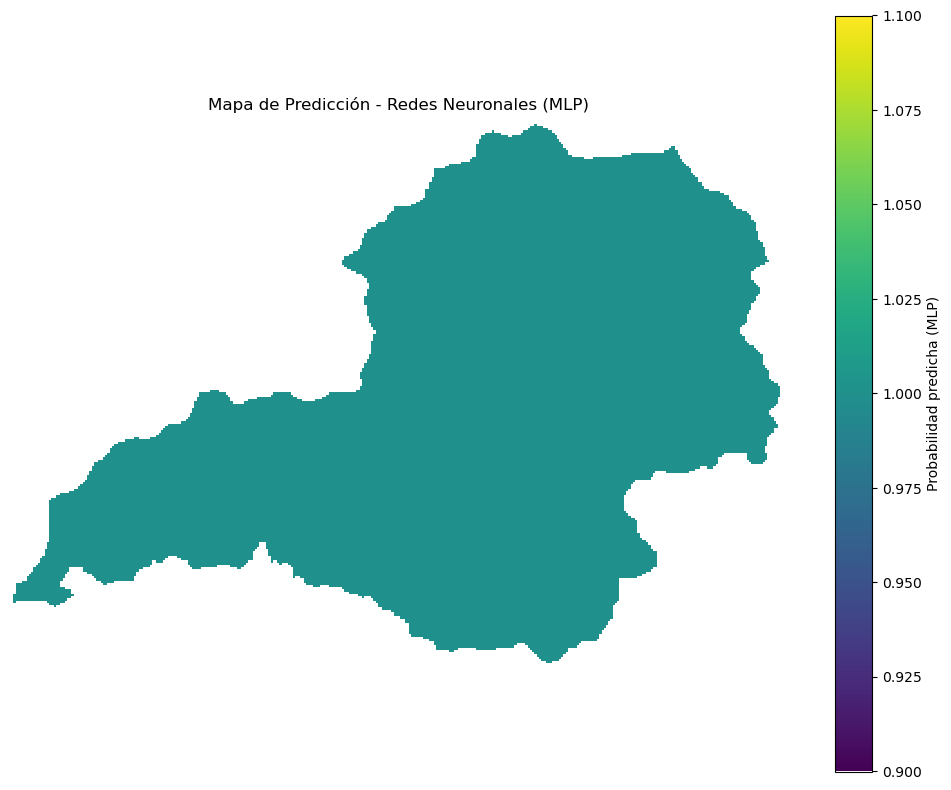

Rango de probabilidades: [1.000, 1.000]


In [65]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# --- Escalar datos ---
scaler = StandardScaler()
scaler.fit(X_01)
X_01_scaled = scaler.transform(X_01)
x_map_scaled = scaler.transform(x_map)

# --- Crear y entrenar modelo MLP ---
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
mlp.fit(X_01_scaled, y_01)

# --- Predecir probabilidades para todo el mapa (solo píxeles válidos) ---
IS = mlp.predict_proba(x_map_scaled)[:, 1]  # Probabilidad de clase 1

# --- Reconstruir raster desde la máscara ---
IS_raster = np.full(pendiente.shape, np.nan, dtype=np.float32)
indices_validos = np.where(mascara_valida.ravel())[0]

if IS.shape[0] != indices_validos.shape[0]:
    raise ValueError("Las dimensiones de IS y la máscara no coinciden.")

IS_raster.ravel()[indices_validos] = IS

# --- Opcional: excluir zonas planas o negativas de pendiente ---
IS_raster = np.where(pendiente < 0, np.nan, IS_raster)

# --- Visualizar resultado ---
plt.figure(figsize=(10, 8))
plt.imshow(IS_raster, cmap='viridis')
plt.colorbar(label='Probabilidad predicha (MLP)')
plt.title("Mapa de Predicción - Redes Neuronales (MLP)")
plt.axis('off')
plt.tight_layout()
plt.show()

# --- Rango de salida ---
print(f"Rango de probabilidades: [{np.nanmin(IS_raster):.3f}, {np.nanmax(IS_raster):.3f}]")


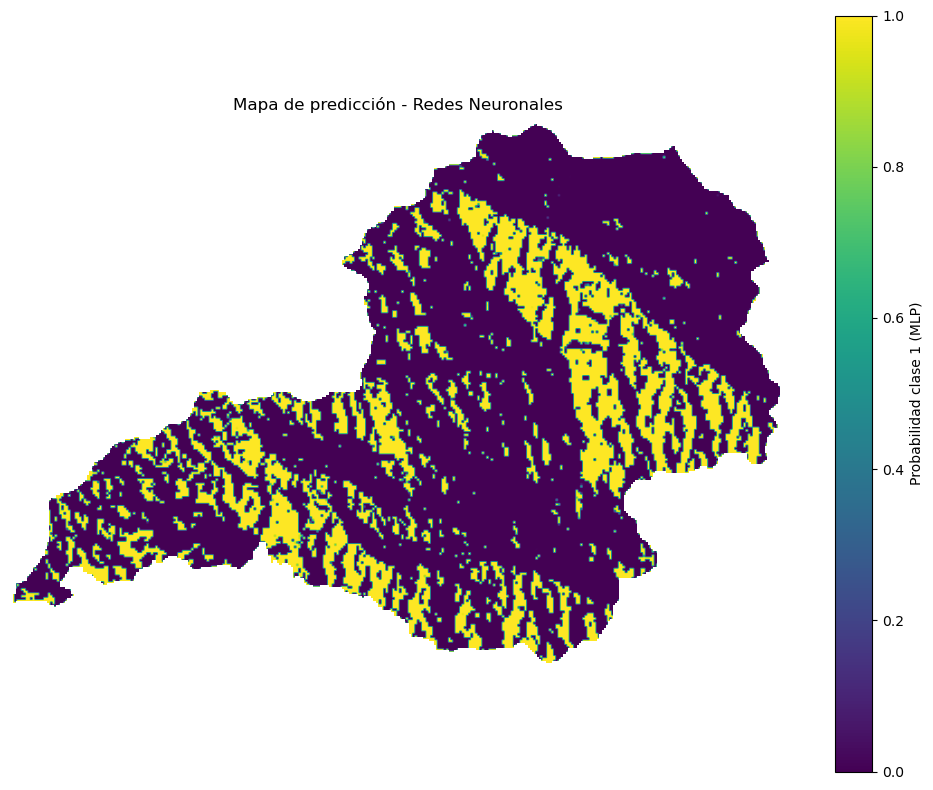

Rango de probabilidades: [0.000, 1.000]


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Paso 1: Combinar X_01 y y_01 en un solo DataFrame
df = pd.DataFrame(X_01)
df['target'] = y_01

# Separar clases
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

# Sobremuestrear la clase 0 (duplicar hasta igualar clase 1)
df_0_over = resample(df_0, replace=True, n_samples=len(df_1), random_state=42)

# Combinar y mezclar
df_bal = pd.concat([df_1, df_0_over]).sample(frac=1, random_state=42)
X_bal = df_bal.drop('target', axis=1)
y_bal = df_bal['target']

# Paso 2: Escalar
scaler = StandardScaler()
X_bal_scaled = scaler.fit_transform(X_bal)
x_map_scaled = scaler.transform(x_map)

# Paso 3: Entrenar MLP
mlp = MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000, random_state=42)
mlp.fit(X_bal_scaled, y_bal)

# Paso 4: Predecir probabilidades sobre el mapa
IS = mlp.predict_proba(x_map_scaled)[:, 1]

# Paso 5: Reconstruir raster desde predicciones
IS_raster = np.full(pendiente.shape, np.nan, dtype=np.float32)
indices_validos = np.where(mascara_valida.ravel())[0]

if IS.shape[0] != indices_validos.shape[0]:
    raise ValueError("Las dimensiones de IS y la máscara no coinciden.")

IS_raster.ravel()[indices_validos] = IS

# Paso 6: Visualizar
plt.figure(figsize=(10, 8))
plt.imshow(IS_raster, cmap='viridis')
plt.colorbar(label='Probabilidad clase 1 (MLP)')
plt.title("Mapa de predicción - Redes Neuronales")
plt.axis('off')
plt.tight_layout()
plt.show()

# Ver rango real
print(f"Rango de probabilidades: [{np.nanmin(IS_raster):.3f}, {np.nanmax(IS_raster):.3f}]")


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# --- Paso 1: Balancear clases ---
df = pd.DataFrame(X_01)
df['target'] = y_01

df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

df_0_over = resample(df_0, replace=True, n_samples=len(df_1), random_state=42)
df_bal = pd.concat([df_1, df_0_over]).sample(frac=1, random_state=42)

X_bal = df_bal.drop('target', axis=1)
y_bal = df_bal['target']

# --- Paso 2: Escalar ---
scaler = StandardScaler()
X_bal_scaled = scaler.fit_transform(X_bal)
x_map_scaled = scaler.transform(x_map)

# --- Paso 3: Definir arquitecturas a comparar ---
arquitecturas = [
    (5,),
    (10,),
    (20, 10),
    (30, 15),
    (50, 30, 10)
]

mapas = []

# --- Paso 4: Entrenar y predecir para cada arquitectura ---
for arch in arquitecturas:
    mlp = MLPClassifier(hidden_layer_sizes=arch, max_iter=1000, random_state=42)
    mlp.fit(X_bal_scaled, y_bal)
    
    IS = mlp.predict_proba(x_map_scaled)[:, 1]

    IS_raster = np.full(pendiente.shape, np.nan, dtype=np.float32)
    indices_validos = np.where(mascara_valida.ravel())[0]
    
    if IS.shape[0] != indices_validos.shape[0]:
        raise ValueError(f"¡Error de tamaño con arquitectura {arch}!")
    
    IS_raster.ravel()[indices_validos] = IS
    mapas.append((arch, IS_raster))

# --- Paso 5: Visualización de resultados ---
cols = 3
rows = int(np.ceil(len(mapas) / cols))

fig, axs = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axs = axs.flatten()

for i, (arch, raster) in enumerate(mapas):
    ax = axs[i]
    im = ax.imshow(raster, cmap='viridis', vmin=0, vmax=1)
    ax.set_title(f'Arquitectura {arch}')
    ax.axis('off')

# Desactivar ejes vacíos si hay menos de 6 arquitecturas
for j in range(len(mapas), len(axs)):
    axs[j].axis('off')

fig.suptitle("Comparación de arquitecturas MLP (mapas de probabilidad)", fontsize=16)
fig.colorbar(im, ax=axs, fraction=0.02)
plt.tight_layout()
plt.show()


SyntaxError: incomplete input (1477610129.py, line 40)

C:\Users\Santi-PC\AppData\Local\Temp\ipykernel_10500\3319805713.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


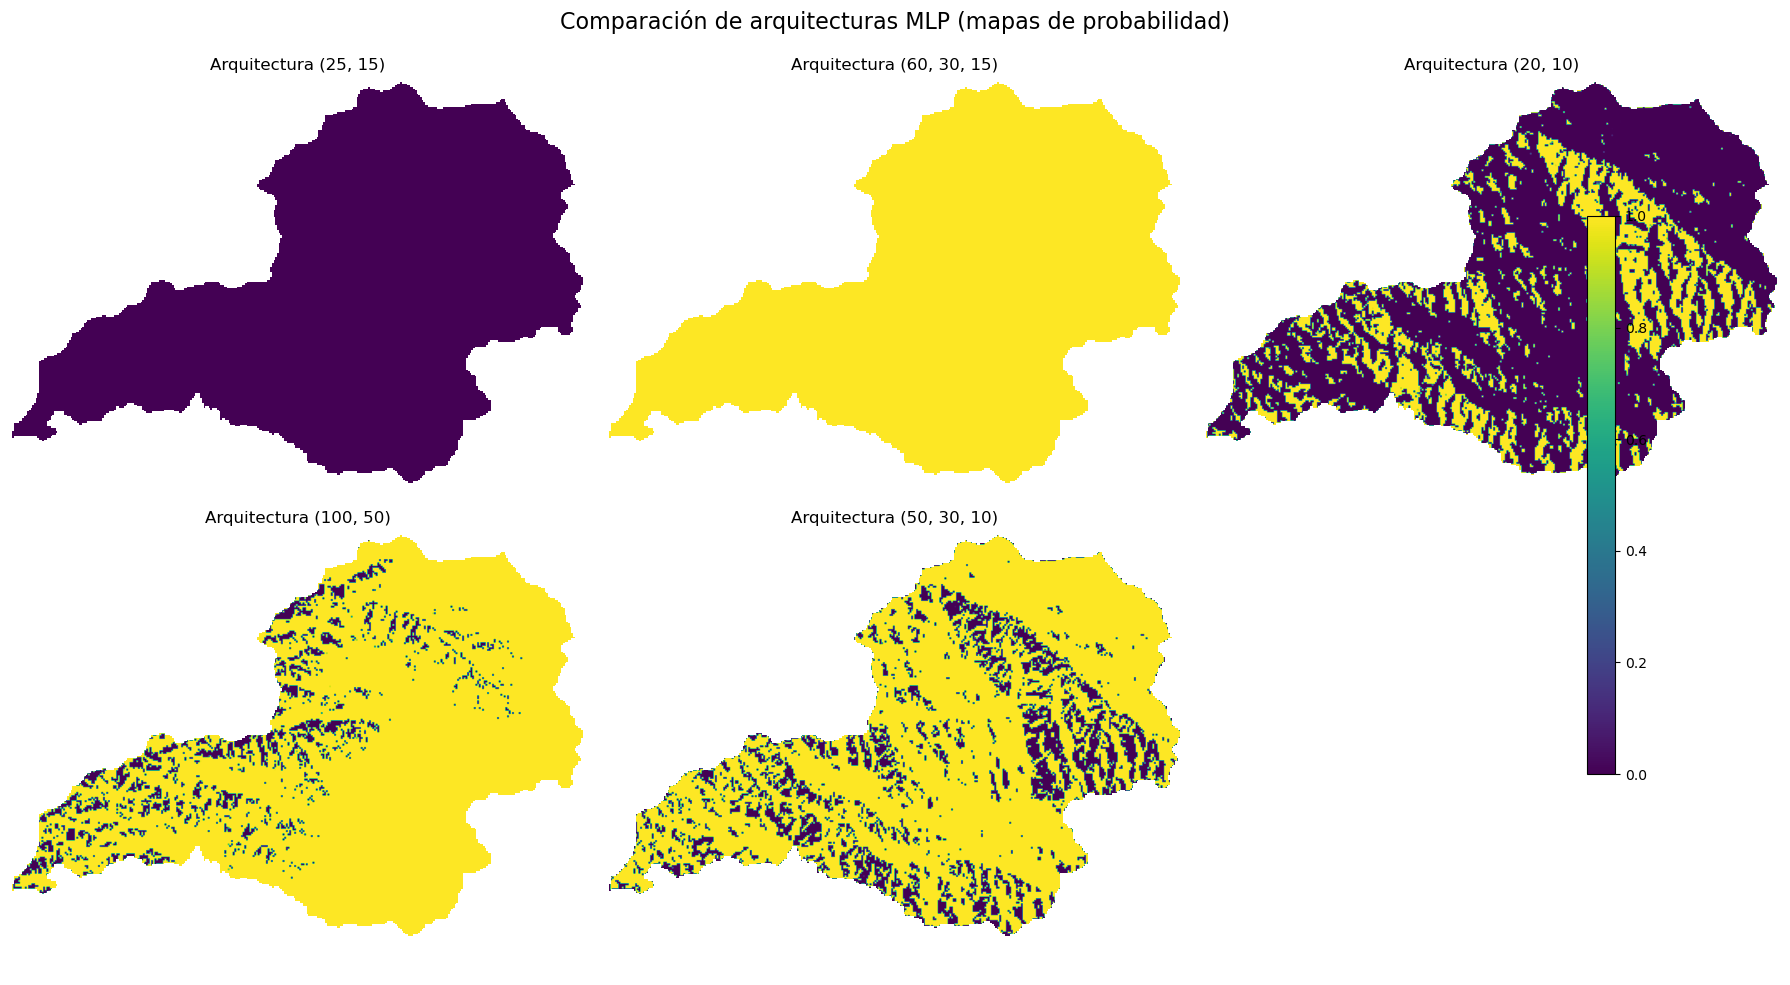

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# --- Paso 1: Balancear clases ---
df = pd.DataFrame(X_01)
df['target'] = y_01

df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

df_0_over = resample(df_0, replace=True, n_samples=len(df_1), random_state=42)
df_bal = pd.concat([df_1, df_0_over]).sample(frac=1, random_state=42)

X_bal = df_bal.drop('target', axis=1)
y_bal = df_bal['target']

# --- Paso 2: Escalar ---
scaler = StandardScaler()
X_bal_scaled = scaler.fit_transform(X_bal)
x_map_scaled = scaler.transform(x_map)

# --- Paso 3: Nuevas arquitecturas ---
arquitecturas = [
    (25, 15),        # nueva
    (60, 30, 15),    # nueva
    (20, 10),        # ya aprobada
    (100, 50),       # nueva
    (50, 30, 10)     # ya aprobada
]

mapas = []

# --- Paso 4: Entrenar y predecir para cada arquitectura ---
for arch in arquitecturas:
    mlp = MLPClassifier(hidden_layer_sizes=arch, max_iter=1000, random_state=42)
    mlp.fit(X_bal_scaled, y_bal)
    
    IS = mlp.predict_proba(x_map_scaled)[:, 1]

    IS_raster = np.full(pendiente.shape, np.nan, dtype=np.float32)
    indices_validos = np.where(mascara_valida.ravel())[0]
    
    if IS.shape[0] != indices_validos.shape[0]:
        raise ValueError(f"¡Error de tamaño con arquitectura {arch}!")
    
    IS_raster.ravel()[indices_validos] = IS
    mapas.append((arch, IS_raster))

# --- Paso 5: Visualización comparativa ---
cols = 3
rows = int(np.ceil(len(mapas) / cols))

fig, axs = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axs = axs.flatten()

for i, (arch, raster) in enumerate(mapas):
    ax = axs[i]
    im = ax.imshow(raster, cmap='viridis', vmin=0, vmax=1)
    ax.set_title(f'Arquitectura {arch}')
    ax.axis('off')

# Apagar ejes vacíos
for j in range(len(mapas), len(axs)):
    axs[j].axis('off')

fig.suptitle("Comparación de arquitecturas MLP (mapas de probabilidad)", fontsize=16)
fig.colorbar(im, ax=axs, fraction=0.02)
plt.tight_layout()
plt.show()


In [104]:
print(X_01.shape)        # Esto te dirá cuántas variables (columnas) hay
print(X_01[:5])          # Esto imprimirá las primeras 5 filas

(1860, 4)
    pendiente   aspecto  curvatura  elevacion
8   -2.398226 -1.770344   0.744604  -0.159700
10  -0.338169  0.083495  -0.019792  -0.276120
11   0.568562  0.115727   0.330677  -0.242165
12   1.165573  0.004840  -0.019792  -0.193656
13   0.493302 -0.444584   1.330665  -0.188805


In [105]:
print(X_01.columns.tolist())

['pendiente', 'aspecto', 'curvatura', 'elevacion']


In [ ]:
##Semiparametricos

In [90]:
from pygam import LinearGAM, s
import matplotlib.pyplot as plt

# Ajustar el modelo GAM solo con la variable 'elevacion'
# Supongamos que 'elevacion' está en la columna 1 de X
# Si elevación es la única variable, puedes seleccionar solo esa columna así:
X_elevacion = X[:, [1]]  # Asegúrate de poner el índice correcto
gam = LinearGAM(s(0)).fit(X_elevacion, y)

# Visualizar el efecto no lineal de la elevación
plt.figure()
plt.title("Efecto no lineal de la elevación")
XX = gam.generate_X_grid(term=0)
plt.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX))
plt.xlabel("Elevación")
plt.ylabel("f(Elevación)")
plt.grid(True)
plt.show()


InvalidIndexError: (slice(None, None, None), [1])

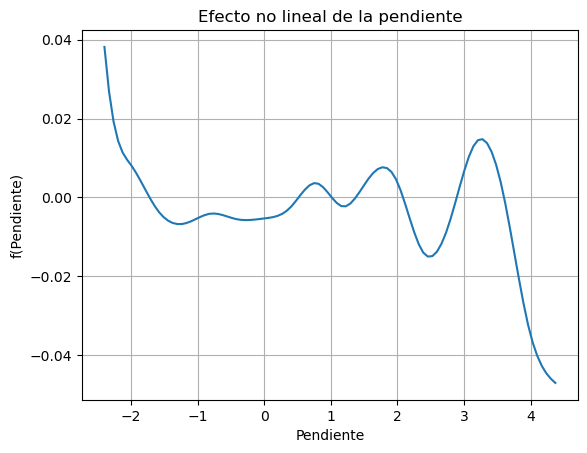

In [86]:
from pygam import LinearGAM, s
import matplotlib.pyplot as plt

# Asegúrate de que el modelo se ajusta usando la variable 'elevación'
# Esto depende de si estás usando varias variables o solo 'elevación'.
gam = LinearGAM(s(1)).fit(X, y)  # Usa el índice correcto para 'elevación'

# Visualización del efecto no lineal de la elevación
plt.figure()
plt.title("Efecto no lineal de la elevación")
XX = gam.generate_X_grid(term=0)  # Aquí term=0 si solo usaste 'elevación'. Si es parte de un modelo multivariable, puede que sea otro índice.
plt.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX))
plt.xlabel("Elevación")
plt.ylabel("f(Elevación)")
plt.grid(True)
plt.show()


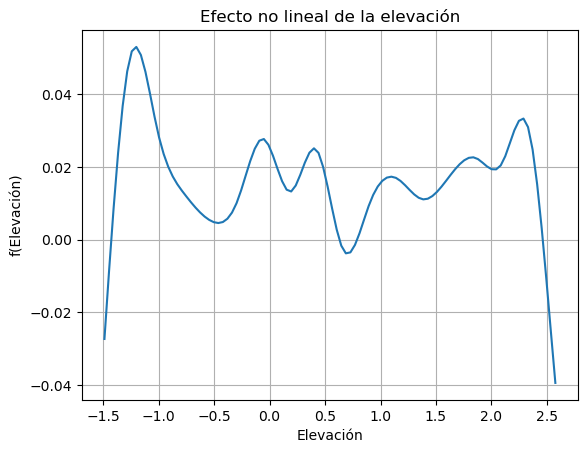

In [92]:
from pygam import LinearGAM, s
import matplotlib.pyplot as plt

# Aislar la columna de 'elevacion' desde el DataFrame
X_elevacion = X[['elevacion']]  # ← O usa iloc si prefieres por índice

# Entrenar el modelo
gam = LinearGAM(s(0)).fit(X_elevacion.values, y)  # Asegúrate de usar .values para pasarle un array

# Visualizar el efecto no lineal
plt.figure()
plt.title("Efecto no lineal de la elevación")
XX = gam.generate_X_grid(term=0)
plt.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX))
plt.xlabel("Elevación")
plt.ylabel("f(Elevación)")
plt.grid(True)
plt.show()


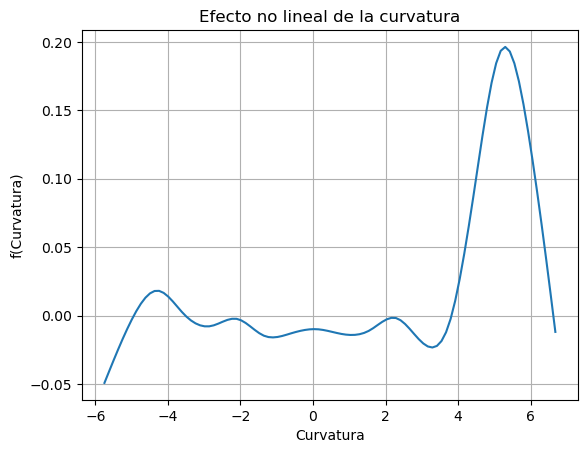

In [93]:
from pygam import LinearGAM, s
import matplotlib.pyplot as plt

# Aislar la columna 'curvatura' desde el DataFrame
X_curvatura = X[['curvatura']]

# Entrenar el modelo
gam = LinearGAM(s(0)).fit(X_curvatura.values, y)

# Visualizar el efecto no lineal
plt.figure()
plt.title("Efecto no lineal de la curvatura")
XX = gam.generate_X_grid(term=0)
plt.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX))
plt.xlabel("Curvatura")
plt.ylabel("f(Curvatura)")
plt.grid(True)
plt.show()



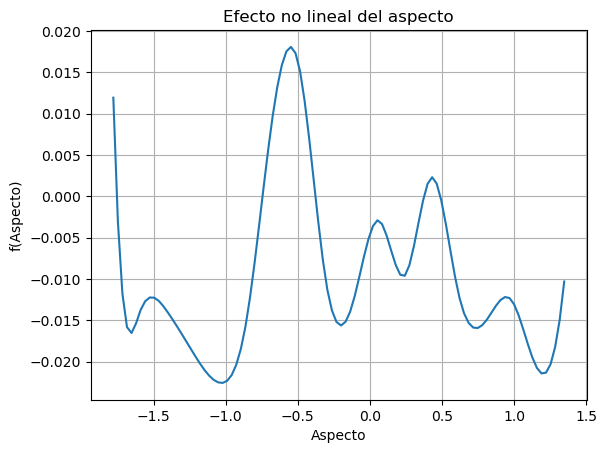

In [94]:
from pygam import LinearGAM, s
import matplotlib.pyplot as plt

# Aislar la columna 'aspecto' desde el DataFrame
X_aspecto = X[['aspecto']]

# Entrenar el modelo
gam = LinearGAM(s(0)).fit(X_aspecto.values, y)

# Visualizar el efecto no lineal
plt.figure()
plt.title("Efecto no lineal del aspecto")
XX = gam.generate_X_grid(term=0)
plt.plot(XX[:, 0], gam.partial_dependence(term=0, X=XX))
plt.xlabel("Aspecto")
plt.ylabel("f(Aspecto)")
plt.grid(True)
plt.show()


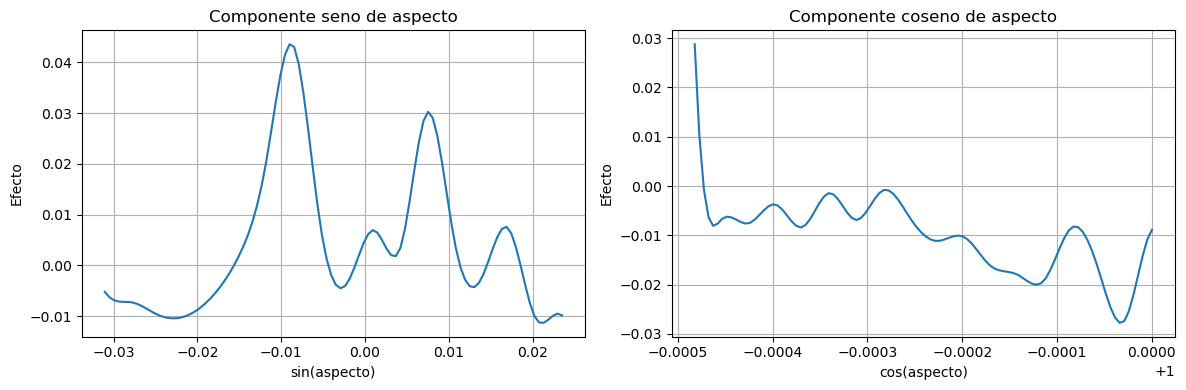

In [95]:
from pygam import LinearGAM, s
import matplotlib.pyplot as plt
import numpy as np

# Calcular componentes circulares
X['aspecto_sin'] = np.sin(np.deg2rad(X['aspecto']))
X['aspecto_cos'] = np.cos(np.deg2rad(X['aspecto']))

# Seleccionar las dos columnas nuevas
X_aspecto_circular = X[['aspecto_sin', 'aspecto_cos']]

# Ajustar el modelo GAM con ambas
gam = LinearGAM(s(0) + s(1)).fit(X_aspecto_circular.values, y)

# Visualizar efectos individuales
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
titles = ['Componente seno de aspecto', 'Componente coseno de aspecto']

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.set_title(titles[i])
    ax.set_xlabel(['sin(aspecto)', 'cos(aspecto)'][i])
    ax.set_ylabel('Efecto')
    ax.grid(True)

plt.tight_layout()
plt.show()

#aspecto es angular: 0° = 360°, pero numéricamente eso no se entiende si se deja como una sola variable continua.

Al convertirlo en sin y cos, el modelo puede aprender correctamente relaciones cíclicas.

In [ ]:
#Código completo para un GAM multivariable:

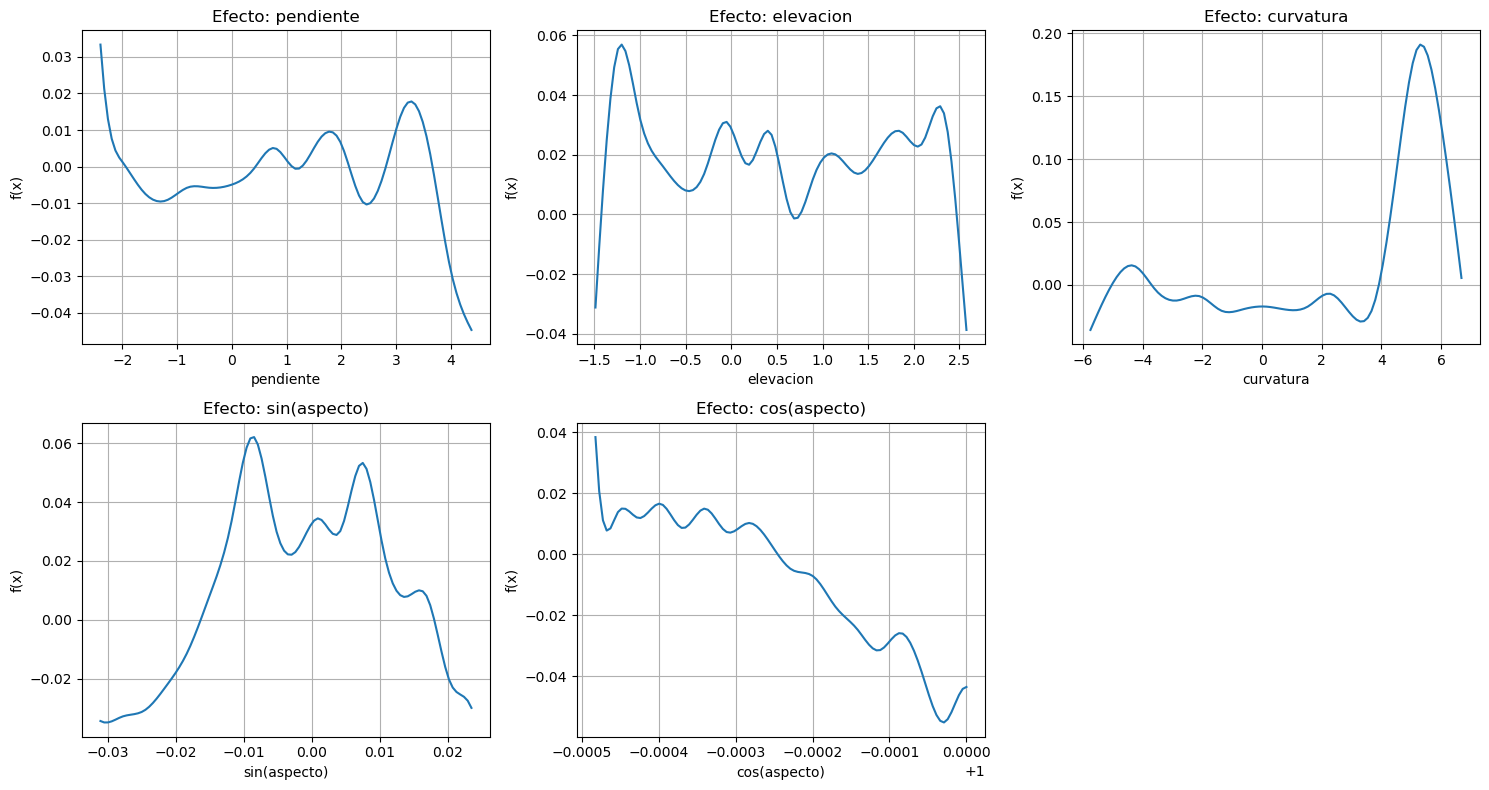

In [96]:
from pygam import LinearGAM, s
import matplotlib.pyplot as plt
import numpy as np

# Transformar 'aspecto' en variables circulares
X['aspecto_sin'] = np.sin(np.deg2rad(X['aspecto']))
X['aspecto_cos'] = np.cos(np.deg2rad(X['aspecto']))

# Seleccionar las variables para el modelo
X_modelo = X[['pendiente', 'elevacion', 'curvatura', 'aspecto_sin', 'aspecto_cos']]

# Ajustar modelo GAM con suavizadores para cada variable
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4)).fit(X_modelo.values, y)

# Visualizar los efectos no lineales de cada variable
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()

variables = ['pendiente', 'elevacion', 'curvatura', 'sin(aspecto)', 'cos(aspecto)']

for i in range(5):
    XX = gam.generate_X_grid(term=i)
    axs[i].plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    axs[i].set_title(f"Efecto: {variables[i]}")
    axs[i].set_xlabel(variables[i])
    axs[i].set_ylabel("f(x)")
    axs[i].grid(True)

# Eliminar el subplot vacío si sobran
fig.delaxes(axs[-1])
plt.tight_layout()
plt.show()
